# Sistem Rekomendasi Anime

## Project Overview

Dalam beberapa tahun terakhir, popularitas anime telah meningkat secara signifikan di seluruh dunia. Dikutip dari jurnal "Kepopuleran dan Penerimaan Anime Jepang di Indonesia", penggemar anime kini lebih sering menikmati anime melalui layanan streaming atau aplikasi khusus anime seperti Netflix dan AbemaTV. Selain itu, platform seperti MyAnimeList menyediakan tempat bagi penggemar anime untuk menonton, mengulas, dan memberikan peringkat pada anime favorit mereka.

Seiring dengan pertumbuhan jumlah pengguna dan variasi anime yang terus berkembang, MyAnimeList memiliki kebutuhan untuk memahami bagaimana preferensi pengguna terbentuk serta bagaimana berbagai faktor memengaruhi rating yang diberikan pada anime. Hal ini penting agar platform dapat meningkatkan kualitas rekomendasi anime yang lebih sesuai dengan preferensi setiap individu.

Dikutip dari jurnal "Rekomendasi Anime dengan Latent Semantic Indexing Berbasis Sinopsis Genre", semakin banyaknya jumlah anime yang beredar saat ini membuat penonton sering kali kesulitan menemukan anime yang sesuai dengan selera mereka. Oleh karena itu, dengan adanya dataset preferensi pengguna yang besar dari MyAnimeList, kita dapat mengeksplorasi pola preferensi ini untuk membangun sistem rekomendasi yang lebih baik dan relevan, sehingga membantu pengguna menemukan anime yang sesuai dengan minat mereka.

Referensi :
* https://www.researchgate.net/profile/Hapnes-Toba/publication/274712918_Rekomendasi_Anime_dengan_Latent_Semantic_Indexing_Berbasis_Sinopsis_Genre/links/5527488f0cf2e486ae40fd8b/Rekomendasi-Anime-dengan-Latent-Semantic-Indexing-Berbasis-Sinopsis-Genre.pdf

* https://ejournal.unitomo.ac.id/index.php/ayumi/article/view/2808

## Business Understanding

### Problem Statements

* Berdasarkan data mengenai pengguna, bagaimana membuat sistem rekomendasi anime yang dipersonalisasi dengan teknik content-based filtering?
* Dengan data rating dan genre anime yang ada, bagaimana situs MyAnimeList dapat merekomendasikan anime lain yang mungkin disukai dan belum pernah dilihat oleh penonton anime?

### Goals
Untuk  menjawab problem statement di atas, dibuatlah sistem rekomendasi dengan tujuan atau goals sebagai berikut:

* Menghasilkan sejumlah rekomendasi anime yang dipersonalisasi untuk pengguna dengan teknik content-based filtering.
* Menghasilkan sejumlah rekomendasi anime yang sesuai dengan preferensi penonton dan belum pernah dilihat oleh penonton tersebut sebelumnya dengan teknik collaborative filtering.

### Solution Approach

* Content-based Filtering: Menggunakan data genre untuk membuat rekomendasi berdasarkan anime yang telah disukai pengguna sebelumnya.
* Collaborative Filtering: Menggunakan pendekatan berbasis kesamaan pengguna untuk merekomendasikan anime yang ditonton oleh pengguna dengan preferensi serupa.

## Data Understanding

In [154]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [155]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Load Data

anime_df = pd.read_csv('/content/drive/MyDrive/Kaggle/Dataset Anime/anime.csv')
rating_df = pd.read_csv('/content/drive/MyDrive/Kaggle/Dataset Anime/rating.csv')

Dataset yang digunakan berasal dari MyAnimeList dan terdiri dari dua file utama, yaitu :

1) Anime.csv

2) Rating.csv

### Exploratory Data Analysis

#### Data Anime

In [157]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [158]:
anime_df.shape

(12294, 7)

Pada Anime.csv, terdapat 12.294 baris data dengan 7 fitur

In [159]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Deskripsi variabel yang ada pada Anime.csv :

* anime_id: ID unik dari setiap anime.
* name: Nama lengkap dari anime.
* genre: Daftar genre anime yang dipisahkan oleh koma.
* type: Jenis anime, seperti TV, Movie, atau OVA.
* episodes: Jumlah episode untuk setiap anime (jika film, jumlahnya adalah 1).
* rating: Rata-rata rating dari komunitas untuk anime tersebut, dari skala 1 sampai 10.
* members: Jumlah anggota komunitas yang tergabung dalam grup anime tersebut.

In [160]:
anime_df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [161]:
# Cek Missing Data

anime_df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


Terdapat nilai kosong pada beberapa kolom, karena jumlahnya dikit maka hapus saja

In [162]:
# Hapus Data Kosong

anime_df.dropna(inplace=True)
anime_df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [163]:
# Cek Data Duplikat

anime_df.duplicated().sum()

0

Tidak ada data yang terduplikat

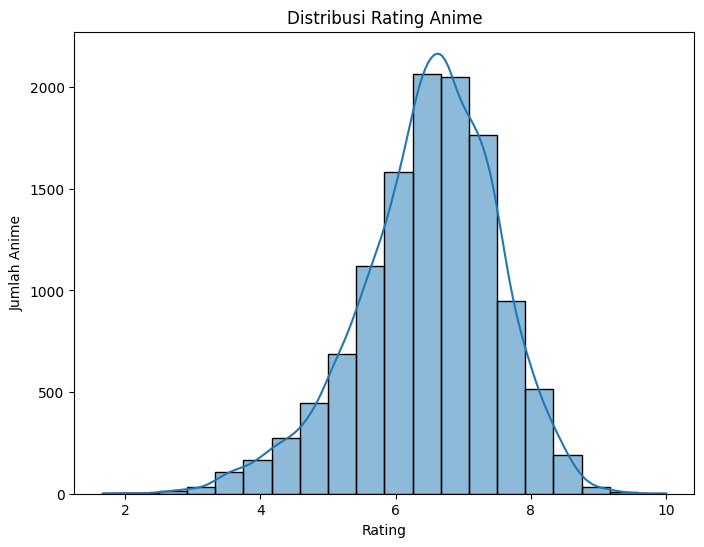

In [164]:
# Plot histogram untuk distribusi rating

plt.figure(figsize=(8,6))
sns.histplot(data=anime_df, x='rating', bins=20, kde=True)
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Jumlah Anime')
plt.show()

Sebagaian besar anime yang ada mendapatkan rating antara 6 - 7 dari skala 1 - 10

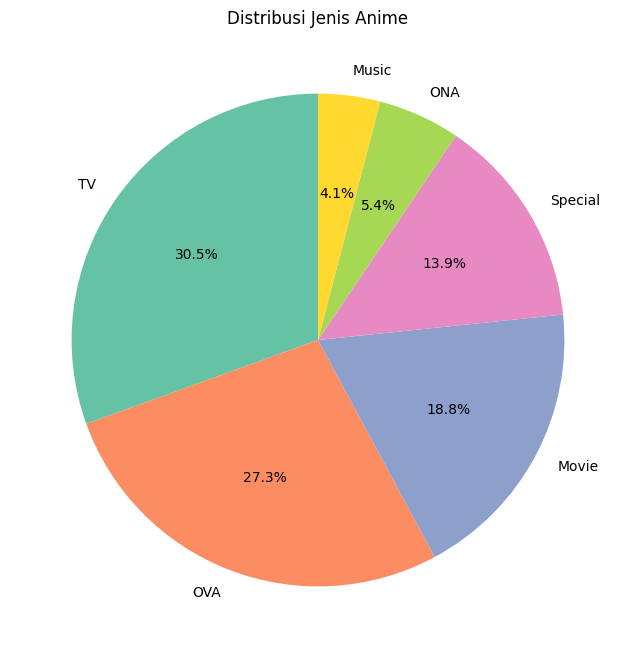

In [165]:
# Plot pie chart untuk jenis anime

plt.figure(figsize=(8,8))
anime_df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Distribusi Jenis Anime')
plt.ylabel('')
plt.show()


Sekitar 57% dari anime yang ada, disajikan dalam bentuk serial TV dan tambahan OVA

<ipython-input-166-67bed6754b7d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=top_10_anime, palette='viridis')


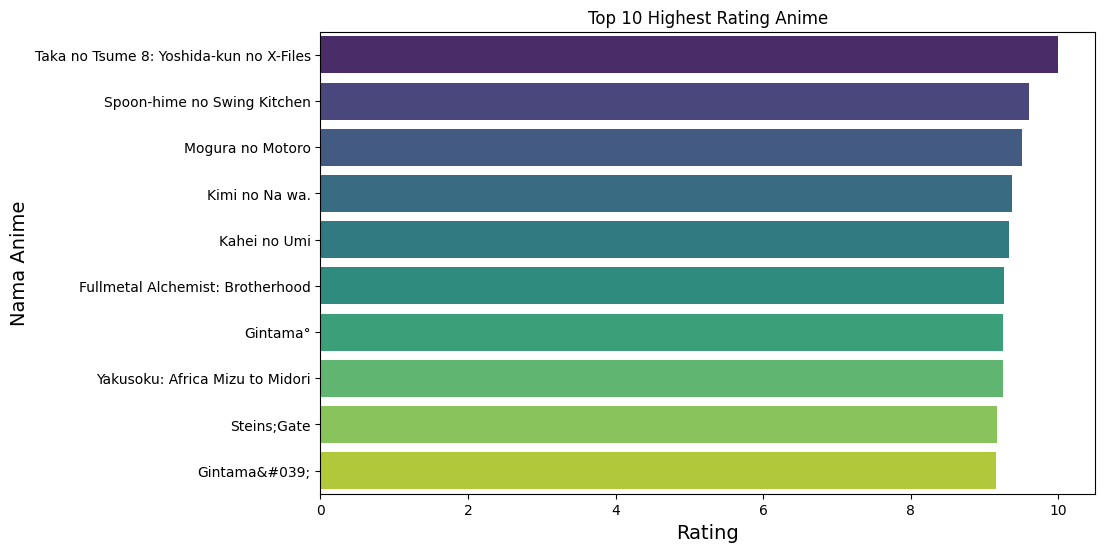

In [166]:
# Highest Rating Anime

# Sort dataset berdasarkan rating tertinggi, kemudian ambil 5 teratas
top_10_anime = anime_df.nlargest(10, 'rating')

# Plot bar chart untuk top 10 highest rating anime
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='name', data=top_10_anime, palette='viridis')
plt.title("Top 10 Highest Rating Anime")
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Nama Anime", fontsize=14)

plt.show()


Anime tertinggi di anime adalah "Taka no Tsume 8". Selain itu, anime berjudul Gintama memiliki 2 seasons dengan rating yang tinggi

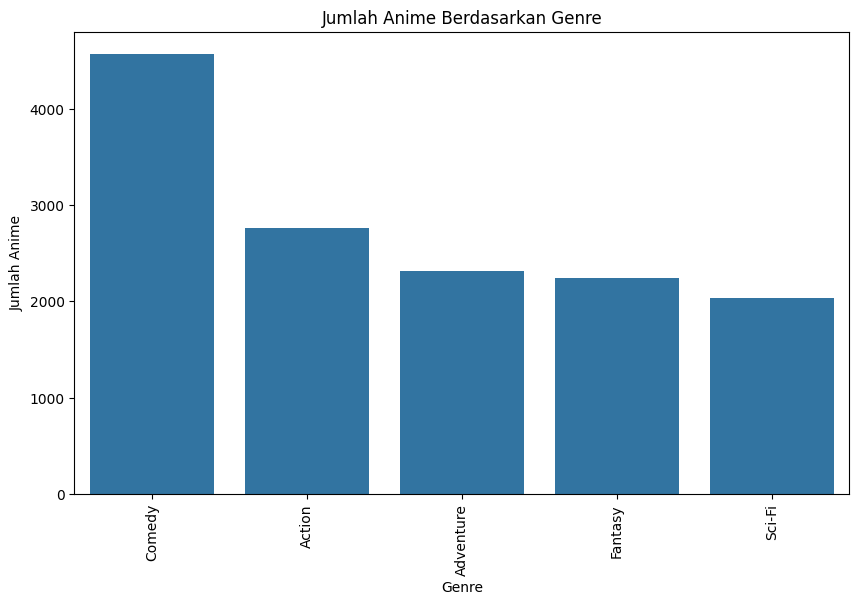

In [167]:
# Pisahkan genre menjadi list
anime_df['genre_split'] = anime_df['genre'].str.split(', ')

# Menghitung jumlah kemunculan setiap genre
from collections import Counter
genre_counter = Counter([genre for genres in anime_df['genre_split'] for genre in genres])

top_5_genres = genre_counter.most_common(5)

top_genre_names = [genre for genre, count in top_5_genres]
top_genre_counts = [count for genre, count in top_5_genres]

# Plot bar chart untuk distribusi genre
plt.figure(figsize=(10,6))
sns.barplot(x=top_genre_names, y=top_genre_counts)
plt.xticks(rotation=90)
plt.title('Jumlah Anime Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah Anime')
plt.show()


Anime ber genre Comedy berjumlah paling banyak, kemudian diikuti genre Action, Adventure, dan Fantasy

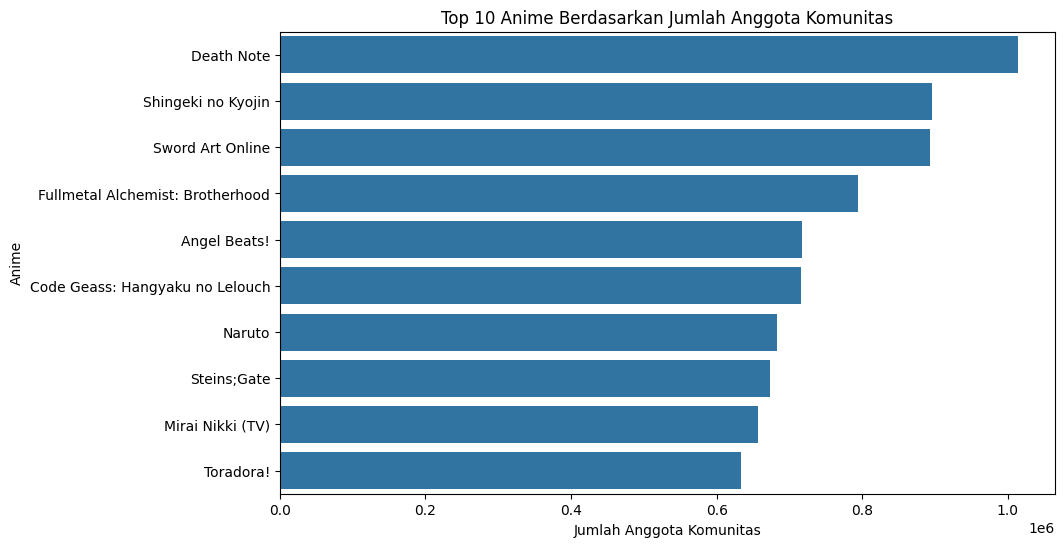

In [168]:
# Mengambil top 10 anime dengan members terbanyak
top_anime = anime_df.nlargest(10, 'members')

# Plot bar chart untuk anime terpopuler
plt.figure(figsize=(10,6))
sns.barplot(x='members', y='name', data=top_anime)
plt.title('Top 10 Anime Berdasarkan Jumlah Anggota Komunitas')
plt.xlabel('Jumlah Anggota Komunitas')
plt.ylabel('Anime')
plt.show()


Death Note menjadi anime yang memiliki member paling banyak dalam komunitas anime nya. Diikuti dengan anime Shingeki no Kyojin dan Sword Art Online

#### Data Rating

In [169]:
rating_df.sample(5)

,user_id,anime_id,rating
918577,8282,7279,7
5178528,49341,814,7
2591138,24509,13333,8
1808135,17537,13667,8
5444985,51411,66,-1


Value kolom rating yang berisi "-1", berarti user tersebut hanya menonton tidak memberi rating

In [170]:
rating_df.shape

(7813737, 3)

Pada Rating.csv, terdapat 7.813.737 baris data dengan 3 fitur

In [171]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Deskripsi variabel yang ada pada Rating.csv

* user_id: ID pengguna yang diacak dan tidak dapat diidentifikasi.
* anime_id: ID anime yang dinilai oleh pengguna.
* rating: Rating dari pengguna, dari skala 1 sampai 10 (nilai -1 jika pengguna menonton tapi tidak memberikan rating).

In [172]:
rating_df.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


## Data Preparation

In [173]:
# Merge Data

# Menggabungkan dataset anime dan rating berdasarkan kolom 'anime_id'
df = pd.merge(anime_df, rating_df, on="anime_id", suffixes=[None, "_user"])

# Ubah nama kolom 'rating_user' menjadi 'user_rating' untuk clarity
df = df.rename(columns={"rating_user": "user_rating"})

df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_split,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",278,-1


In [174]:
# Cek Data Kosong

df.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0
genre_split,0
user_id,0
user_rating,0


In [175]:
# Membuat salinan dataset

anime_data = df.copy()

In [176]:
# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
anime_id = anime_data['anime_id'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
anime_name = anime_data['name'].tolist()

# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
anime_genre = anime_data['genre'].tolist()

In [177]:
# Membuat dataset untuk Rekomendasi Berdasarkan Genre

anime_new = pd.DataFrame({
    'id': anime_id,
    'anime_name': anime_name,
    'genre': anime_genre
})
anime_new

,id,anime_name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai


In [178]:
# Cek Data Duplikat

anime_new.duplicated().sum()

7802449

In [179]:
# Hapus Data Duplikat

anime_new.drop_duplicates(inplace=True)
anime_new.duplicated().sum()

0

In [180]:
# Memecah Genre Anime

# Hapus delimiter
def get_string(row):
    result_string = row.genre
    result_string = result_string.replace(', ',' ')
    return  result_string
anime_new['genre'] = anime_new.apply(get_string,axis=1)

# Cek hasil preprocessing
anime_new.head()


,id,anime_name,genre
0,32281,Kimi no Na wa.,Drama Romance School Supernatural
2199,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
26773,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
28159,9253,Steins;Gate,Sci-Fi Thriller
47442,9969,Gintama&#039;,Action Comedy Historical Parody Samurai Sci-Fi...


## Modeling - Content-Based Filtering

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#### TF-IDF Vectorizer

In [182]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit dan transformasi genre ke dalam TF-IDF Matrix
tfidf_matrix = tfidf.fit_transform(anime_new['genre'])

# Lihat ukuran TF-IDF Matrix (jumlah anime x jumlah genre unik)
tfidf_matrix.shape

(11162, 46)

Perhatikanlah, matriks yang kita miliki berukuran (11162, 46). Nilai 11162 merupakan ukuran data dan 46 merupakan matrik kategori genre anime.

In [183]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29275389, 0.31701268, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.24896387, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [217]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan nama anime

anime_genres = pd.DataFrame(
    tfidf_matrix.todense(),  # Matrix hasil dari TF-IDF
    columns=tfidf.get_feature_names_out(),  # Genre sebagai kolom
    index=anime_new['anime_name']  # Nama anime sebagai baris
).sample(22, axis=1).sample(10, axis=0)  # Sampel 22 genre dan 10 anime

anime_genres

,yuri,historical,supernatural,martial,sci,mecha,magic,parody,super,seinen,...,fi,romance,hentai,game,slice,shounen,cars,thriller,action,sports
anime_name,,,,,,,,,,,,,,,,,,,,,
Onnanoko tte.,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.517488,0.000000,0.0,0.0,0.000000,0.000000
Soukyuu no Fafner: Dead Aggressor - Exodus Special,0.0,0.0,0.000000,0.0,0.35414,0.455031,0.000000,0.0,0.0,0.000000,...,0.35414,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.314642,0.000000
Monster Strike,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.823566,0.000000,0.000000,0.0,0.0,0.381533,0.000000
Black Lagoon,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.859597,...,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.510973,0.000000
Yowamushi Pedal: Re:RIDE,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.503328,0.0,0.0,0.000000,0.713504
Aoi Kokuhaku,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Arashi no Yoru ni,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Madlax,0.0,0.0,0.341294,0.0,0.00000,0.000000,0.371249,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.285423,0.0,0.0,0.000000,0.000000
Eiga de Toujou! Tamagotchi Dokidoki! Uchuu no Maigotchi!?,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Output matriks tf-idf di atas menunjukkan Anime Aoi Kokuhaku memiliki genre Hentai. Hal ini terlihat dari nilai matriks 1.0 pada genre Hentai. Selanjutnya, anime Black Lagoon termasuk dalam genre Seinen dan Action, karena terdapat nilai matriks yang mendekati 1 pada kolom kedua genre tersebut. Demikian seterusnya.

#### Cosine Similiarity

In [185]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14918358, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14918358, 1.        , 0.17602405, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17602405, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

Pada tahapan ini, kita menghitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, kita telah berhasil menghitung kesamaan (similarity) antar anime. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

In [214]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    columns=anime_new['anime_name'],
    index=anime_new['anime_name']
)
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (11162, 11162)


anime_name,Pokemon Advanced Generation: Nanayo no Negaiboshi Jirachi,Biohazard 4: Incubate,Ningen Shikkaku: Director&#039;s Cut-ban,Hikenai Guitar wo Hikundaze,Momotarou
anime_name,,,,,
Muumindani no Suisei,0.883484,0.000000,0.000000,0.0,0.00000
Pareo wa Emerald,0.000000,0.000000,0.000000,1.0,0.00000
Ookiku Furikabutte: Natsu no Taikai-hen,0.142219,0.000000,0.000000,0.0,0.00000
Kupu~!! Mamegoma!,0.527561,0.000000,0.000000,0.0,0.00000
Kage,0.280224,0.000000,0.590001,0.0,0.59818
Ghost in the Shell: Arise - Border:4 Ghost Stands Alone,0.000000,0.237092,0.347336,0.0,0.00000
Dog Days Recap,0.403163,0.080728,0.000000,0.0,0.00000
Taiho Shichau zo: Nagisa no Koutsuu Yuudou,0.089059,0.353129,0.290315,0.0,0.00000
Kono Shihai kara no Sotsugyou: Ozaki Yutaka,0.000000,0.000000,0.295568,0.0,0.00000


Perhatikanlah output matriks di atas. Semakin nilai angka mendekati 1.0 mengindikasikan bahwa anime pada kolom X (horizontal) memiliki kesamaan dengan anime pada baris Y (vertikal). Sebagai contoh, anime Pareo wa Emerald memiliki kemiripan (similiarity) dengan anime Hikenai Guitar wo Hikundaze berdasarkan genre nya.

#### Membuat Rekomendasi Anime

Di sini, kita membuat fungsi anime_recommendations dengan beberapa parameter sebagai berikut:

* nama_anime : Nama anime (index kemiripan dataframe).
* similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
* items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘anime_name’ dan genre.
* k : Banyak rekomendasi yang ingin diberikan.

In [187]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=anime_new[['anime_name', 'genre']], k=5):
    """
    Rekomendasi anime berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_anime : tipe data string (str)
                Nama anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Dengan menggunakan argpartition, kita mengambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, kita mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest. Berikutnya, kita perlu menghapus nama_anime yang yang dicari agar tidak muncul dalam daftar rekomendasi.

Contoh di bawah ini, kita akan mencari anime yang mirip dengan "Mob Psycho 100", sehingga kita perlu drop nama_anime "Mob Psycho 100" agar tidak muncul dalam daftar rekomendasi yang diberikan nanti.

In [188]:
anime_new[anime_new.anime_name.eq('Mob Psycho 100')]

,id,anime_name,genre
546766,32182,Mob Psycho 100,Action Comedy Slice of Life Supernatural


Perhatikanlah, "Mob Psycho 100" masuk dalam genre Action Comedy Slice of Life Supernatural. Tentu kita berharap rekomendasi yang diberikan adalah anime dengan kategori yang mirip. Nah, sekarang, dapatkan anime recommendation dengan memanggil fungsi yang telah kita definisikan sebelumnya:

In [189]:
anime_recommendations('Mob Psycho 100')

,anime_name,genre
0,Dororonpa!,Comedy Slice of Life Supernatural
1,Peeping Life x Kaijuu Sakaba Kaiji: Kaijuu-tac...,Comedy Slice of Life Supernatural
2,Tansu Warashi.,Comedy Slice of Life Supernatural
3,Flying Witch Petit,Comedy Slice of Life Supernatural
4,Musaigen no Phantom World,Action Comedy Fantasy Slice of Life Supernatural


In [190]:
anime_recommendations('Naruto')

,anime_name,genre
0,Naruto x UT,Action Comedy Martial Arts Shounen Super Power
1,Naruto: Shippuuden Movie 4 - The Lost Tower,Action Comedy Martial Arts Shounen Super Power
2,Naruto Shippuuden: Sunny Side Battle,Action Comedy Martial Arts Shounen Super Power
3,Naruto Soyokazeden Movie: Naruto to Mashin to ...,Action Comedy Martial Arts Shounen Super Power
4,Kyutai Panic Adventure!,Action Martial Arts Shounen Super Power


## Modeling - Collaborative Filtering

In [191]:
# import library

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

#### Data Preparation

In [192]:
df = rating_df
df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Hapus data rating yang bernilai -1, karena hal tersebut menunjukkan bahwa user hanya menonton tanpa memberi rating

In [193]:
df = df[df['rating'] != -1]
df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [194]:
df.shape

(6337241, 3)

Ternyata data banyak sekali, disini saya akan mengambil 2000 data saja. Hal ini dikarenakan keterbatasan komputasi

In [195]:
df = df[:2000]

In [196]:
df.shape

(2000, 3)

Pada tahap ini, Anda perlu melakukan persiapan data untuk menyandikan (encode) fitur ‘user_id’ dan ‘anime_id’ ke dalam indeks integer.

In [197]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id: ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)


list user_id:  [1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
encoded user_id:  {1: 0, 2: 1, 3: 2, 5: 3, 7: 4, 8: 5, 9: 6, 10: 7, 11: 8, 12: 9, 14: 10, 15: 11, 16: 12, 17: 13, 18: 14, 19: 15, 20: 16, 21: 17, 22: 18, 23: 19, 24: 20, 25: 21, 26: 22, 27: 23}
encoded angka ke user_id:  {0: 1, 1: 2, 2: 3, 3: 5, 4: 7, 5: 8, 6: 9, 7: 10, 8: 11, 9: 12, 10: 14, 11: 15, 12: 16, 13: 17, 14: 18, 15: 19, 16: 20, 17: 21, 18: 22, 19: 23, 20: 24, 21: 25, 22: 26, 23: 27}


In [198]:
# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = df['anime_id'].unique().tolist()

# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}
print('encoded angka ke userID: ', anime_encoded_to_anime)


encoded angka ke userID:  {0: 8074, 1: 11617, 2: 11757, 3: 15451, 4: 11771, 5: 20, 6: 154, 7: 170, 8: 199, 9: 225, 10: 341, 11: 430, 12: 527, 13: 552, 14: 813, 15: 1119, 16: 1121, 17: 1122, 18: 1132, 19: 1292, 20: 1313, 21: 1526, 22: 1535, 23: 1564, 24: 1689, 25: 1764, 26: 1943, 27: 2201, 28: 2404, 29: 2847, 30: 3588, 31: 4026, 32: 5114, 33: 5231, 34: 6178, 35: 6702, 36: 6880, 37: 7695, 38: 9107, 39: 9135, 40: 9760, 41: 9917, 42: 9919, 43: 9989, 44: 10408, 45: 10507, 46: 11111, 47: 11703, 48: 11737, 49: 11759, 50: 12671, 51: 14075, 52: 14093, 53: 14345, 54: 14513, 55: 16498, 56: 16512, 57: 16782, 58: 16894, 59: 16918, 60: 17265, 61: 18097, 62: 18115, 63: 18393, 64: 19315, 65: 19815, 66: 20021, 67: 20159, 68: 20507, 69: 20583, 70: 21507, 71: 21881, 72: 22199, 73: 22297, 74: 22319, 75: 22547, 76: 22729, 77: 23301, 78: 23321, 79: 23333, 80: 23755, 81: 24415, 82: 26243, 83: 27631, 84: 27899, 85: 28121, 86: 28171, 87: 28223, 88: 28497, 89: 28701, 90: 28891, 91: 29854, 92: 31043, 93: 31859, 

In [199]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping anime_id ke dataframe anime
df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

In [200]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah anime
num_anime = len(anime_encoded_to_anime)
print(num_anime)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

24
1130
Number of User: 24, Number of anime: 1130, Min Rating: 1.0, Max Rating: 10.0


Tahap persiapan telah selesai. Berikut adalah hal-hal yang telah kita lakukan pada tahap ini:

* Memahami data rating yang kita miliki.
* Menyandikan (encode) fitur ‘user_id’ dan 'anime_id' ke dalam indeks integer.
* Memetakan ‘user_id’ dan 'anime_id' ke dataframe yang berkaitan.
* Mengecek beberapa hal dalam data seperti jumlah user, jumlah anime, kemudian mengubah nilai rating menjadi float.

Tahap persiapan ini penting dilakukan agar data siap digunakan untuk pemodelan. Namun sebelumnya, kita perlu membagi data untuk training dan validasi terlebih dahulu

#### Splitting Data

In [201]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,anime_id,rating,user,anime
2501,23,763,10.0,19,1087
562,5,11761,4.0,3,329
1824,17,11617,8.0,13,1
1155,8,10620,6.0,5,584
1751,17,7465,9.0,13,902
...,...,...,...,...,...
1561,14,14345,7.0,10,53
1759,17,8100,7.0,13,904
1110,7,30365,7.0,4,677
2008,17,21405,7.0,13,462


Selanjutnya, bagi data train dan validasi dengan komposisi 80:20. Namun sebelumnya, kita perlu memetakan (mapping) data user dan anime menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [202]:
# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = df[['user','anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  19 1087]
 [   3  329]
 [  13    1]
 ...
 [   4  677]
 [  13  462]
 [  10  350]] [1.         0.33333333 0.77777778 ... 0.66666667 0.66666667 0.66666667]


Di sini, kita membuat class RecommenderNet dengan keras Model class. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs Keras dengan beberapa adaptasi sesuai kasus yang sedang kita selesaikan

In [203]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [204]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [205]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6934 - root_mean_squared_error: 0.2912 - val_loss: 0.6679 - val_root_mean_squared_error: 0.2745
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6376 - root_mean_squared_error: 0.2285 - val_loss: 0.6595 - val_root_mean_squared_error: 0.2668
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6299 - root_mean_squared_error: 0.2265 - val_loss: 0.6491 - val_root_mean_squared_error: 0.2571
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6229 - root_mean_squared_error: 0.2174 - val_loss: 0.6445 - val_root_mean_squared_error: 0.2526
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6099 - root_mean_squared_error: 0.1986 - val_loss: 0.6394 - val_root_mean_squared_error: 0.2476
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6076 - root_mean_squared_error: 0.2003 - val_loss: 0.6367 - val_root_mean_squared_error: 0.2449
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

#### Evaluasi

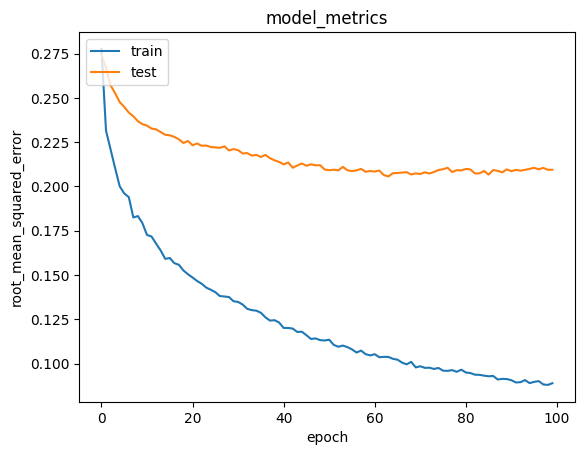

In [206]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.09 dan error pada data validasi sebesar 0.2. Nilai tersebut cukup bagus untuk sistem rekomendasi

Untuk mendapatkan rekomendasi anime, pertama kita ambil sampel user secara acak dan definisikan variabel anime_not_visited yang merupakan daftar anime yang belum pernah ditonton oleh pengguna.

Sebelumnya, pengguna telah memberi rating pada beberapa anime yang telah mereka tonton. Kita menggunakan rating ini untuk membuat rekomendasi anime yang mungkin cocok untuk pengguna. Nah, anime yang akan direkomendasikan tentulah anime yang belum pernah ditonton oleh pengguna. Oleh karena itu, kita perlu membuat variabel anime_not_visited sebagai daftar anime untuk direkomendasikan pada pengguna.

In [207]:
data_anime = anime_new[:2000]
df = pd.read_csv('/content/drive/MyDrive/Kaggle/Dataset Anime/rating.csv')
df = df[:2000]

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
anime_visited_by_user = df[df.user_id == user_id]

anime_not_visited = data_anime[~data_anime['id'].isin(anime_visited_by_user.anime_id.values)]['id']
anime_not_visited = list(
    set(anime_not_visited)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_visited = [[anime_to_anime_encoded.get(x)] for x in anime_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_visited), anime_not_visited)
)

In [209]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_visited[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi anime dari user: {}'.format(user_id))
print('===' * 9)
print('Anime dengan Rating Tertinggi dari user')
print('----' * 8)

top_anime_user = (
    anime_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

data_anime_rows = data_anime[data_anime['id'].isin(top_anime_user)]
for row in data_anime_rows.itertuples():
    print(row.anime_name, ':', row.genre)

print('----' * 8)
print('Top 10 Rekomendasi Anime untuk User')
print('----' * 8)

recommended_anime = data_anime[data_anime['id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.anime_name, ':', row.genre)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Menampilkan rekomendasi anime dari user: 5
Anime dengan Rating Tertinggi dari user
--------------------------------
Gintama&#039; : Action Comedy Historical Parody Samurai Sci-Fi Shounen
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare : Action Comedy Historical Parody Samurai Sci-Fi Shounen
Haikyuu!! Second Season : Comedy Drama School Shounen Sports
Great Teacher Onizuka : Comedy Drama School Shounen Slice of Life
Stranger: Mukou Hadan : Action Adventure Historical Samurai
--------------------------------
Top 10 Rekomendasi Anime untuk User
--------------------------------
Fullmetal Alchemist: Brotherhood : Action Adventure Drama Fantasy Magic Military Shounen
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou : Comedy Drama School Shounen Sports
Bakemono no Ko : Adventure Supernatural
Baccano! : Action Comedy Historical Mystery Seinen Supernatural
Shingeki no Kyojin : Action Drama Fantasy Shounen Super Power
Kuroko no Basket : Comedy

Sebagai contoh, hasil di atas adalah rekomendasi untuk user dengan id 17. Dari output tersebut, kita dapat membandingkan antara anime dengan rating tertinggi dari user dan Top 10 anime recommendation untuk user.

Perhatikanlah, beberapa anime rekomendasi menyediakan genre yang sesuai dengan rating user. Rekomendasi yang paling banyak dihasilkan yaitu anime dengan genre Comedy, Action, dan Shounen